# Testing network with more input features.

The initial network proposed in the scaled vs unscaled performance test is here reapplied on the extended dataset.


In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import sys
sys.path.append("..")
from src.data import Dataset
from src.model import NeuralNetwork
from src.utils import show_plots, show_accuracy_loss 

In [2]:
d = Dataset(dataset_path="../data/processed/extended/train_scaled_extended.csv")
x_train, x_val, y_train, y_val = d.get_splits()

# Building the network
Create a network with 4 layers and train. I am again appliying a rule of thumb for hidden units 
$$\mathit{hidden\;neurons} = \frac{2}{3}\mathit{input} + \mathit{output} $$

In [3]:
net = NeuralNetwork(layers=[layers.Dense(units=144, activation='relu'),
                            layers.Dense(units=71, activation='relu'),
                            layers.Dense(units=35, activation='relu'),
                            layers.Dense(10, activation='softmax')], 
                    optimizer=keras.optimizers.RMSprop(), 
                    loss=keras.losses.SparseCategoricalCrossentropy(), 
                    metrics=["accuracy"])

In [4]:
history = net.fit(x_train, 
                  y_train, 
                  validation_data=(x_val, y_val),
                  batch_size=128, 
                  epochs=25);

Epoch 1/25
32/32 [==============================] - 1s 7ms/step - loss: 1.4521 - accuracy: 0.5369 - val_loss: 0.9223 - val_accuracy: 0.7222
Epoch 2/25
32/32 [==============================] - 0s 4ms/step - loss: 0.7613 - accuracy: 0.7878 - val_loss: 0.6310 - val_accuracy: 0.8089
Epoch 3/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.8508 - val_loss: 0.5078 - val_accuracy: 0.8467
Epoch 4/25
32/32 [==============================] - 0s 4ms/step - loss: 0.4019 - accuracy: 0.8797 - val_loss: 0.4581 - val_accuracy: 0.8622
Epoch 5/25
32/32 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.9094 - val_loss: 0.3889 - val_accuracy: 0.8667
Epoch 6/25
32/32 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9316 - val_loss: 0.3457 - val_accuracy: 0.8933
Epoch 7/25
32/32 [==============================] - 0s 4ms/step - loss: 0.2017 - accuracy: 0.9469 - val_loss: 0.3101 - val_accuracy: 0.9044
Epoch 8/25
32/32 [==

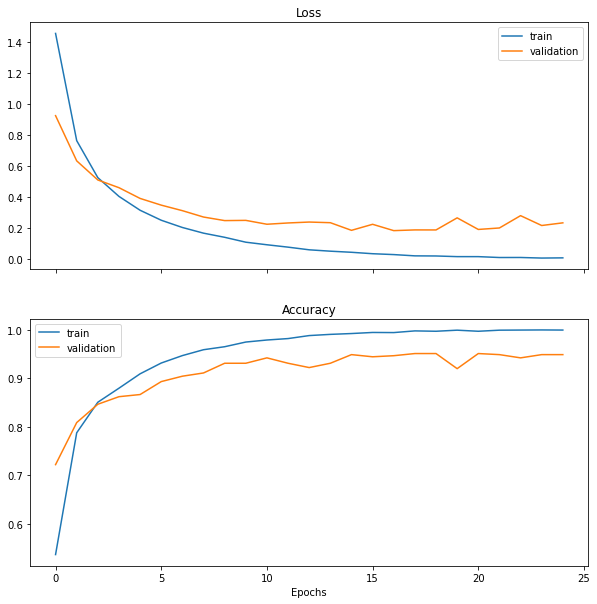

In [5]:
show_plots(history)

In [6]:
show_accuracy_loss(net, scaling="scaled_extended")

7/7 [==============================] - 0s 2ms/step - loss: 2.0674 - accuracy: 0.6941

Accuracy:
	Mean: 0.653134036064148 
	Standard deviation: 0.031425143761540215

Loss:
	Mean: 2.435490918159485 
	Standard deviation: 0.6057377770946765


## Results

After extending the dataset with 12 new features the accuracy improved from about 0.58 to about 0.65, that's a good result considering the initial performance was about 0.5 on the unscaled and unextended dataset.